# SIMPLE LINEAR REGRESION

Simple Linear Regression memodelkan hubungan antara response variable terhadap explanatory variable sebagai garis lurus (linear)

# SAMPLE DATASET

Tahapan ini merupakan persiapan dataset yang dibuat secara manual untuk membentuk model dari simple linear regression

In [1]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],
         'harga' : [7, 9, 13, 17, 18]
        }

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7
1,8,9
2,10,13
3,14,17
4,18,18


# VISUALISAI DATA

<function matplotlib.pyplot.show(close=None, block=None)>

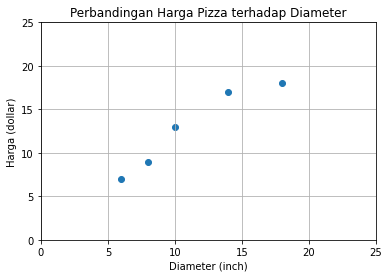

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x = pizza_df['diameter'], y = pizza_df['harga'])

plt.title('Perbandingan Harga Pizza terhadap Diameter')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

# PENYESUAIAN DATASET

In [3]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X = {X}')
print(f'y = {y}')

X = [ 6  8 10 14 18]
y = [ 7  9 13 17 18]


In [4]:
X = X.reshape(-1,1)
X.shape

(5, 1)

In [5]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

# TRAINING SIMPLE LINEAR REGRESSION

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

# VISUALISASI SIMPLE LINEAR REGRESSION

In [7]:
X_test = np.array([0, 25, 10, 21]).reshape(-1, 1)
y_test = model.predict(X_test)
y_test

array([ 2.03448276, 26.06465517, 11.64655172, 22.21982759])

<function matplotlib.pyplot.show(close=None, block=None)>

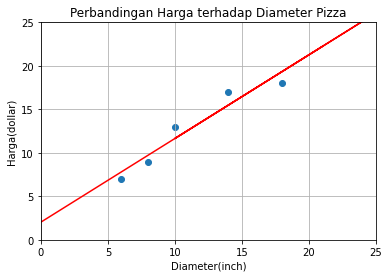

In [8]:
plt.scatter(X, y)
plt.plot(X_test, y_test, '-r')

plt.title('Perbandingan Harga terhadap Diameter Pizza')
plt.xlabel('Diameter(inch)')
plt.ylabel('Harga(dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show

# RUMUS SIMPLE LINEAR REGRESSION

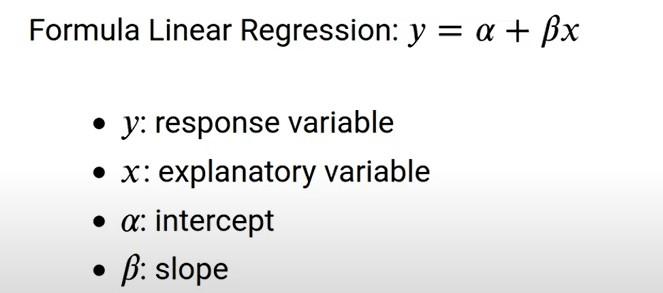

In [9]:
print(f'intercept = {model.intercept_}')
print(f'slope = {model.coef_}')

intercept = 2.034482758620692
slope = [0.9612069]


# MENCARI NILAI SLOPE

Nilai slope pada simple linear regression dapat dihitung dengan formula berikut,

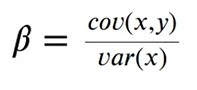

Dimana : </br>
cov = covariance </br>
x   = feature </br>
y   = target </br>
var = variance </br>

## Variance

In [14]:
variance_x = np.var(X.flatten(), ddof = 1)
print(f'variance = {variance_x}')

variance = 23.2


## Covariance

In [17]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance = {covariance_xy}')

covariance = 22.299999999999997


## Slope

In [20]:
slope = covariance_xy / variance_x
print(f'Slope = {slope}')

Slope = 0.9612068965517241


# MENCARI NILAI INTERCEPT

Berikut merupakan formula untuk menghitung nilai intercept dalam simple linear regression

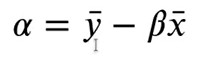

In [22]:
intercept = y.mean() - (slope * X.mean())
print(f'Intercept = {intercept}')

Intercept = 2.034482758620692


# PREDIKSI HARGA PIZZA

In [23]:
diameter_pizza = np.array([13, 7, 21]).reshape(-1, 1)
diameter_pizza

array([[13],
       [ 7],
       [21]])

In [36]:
y_pred = model.predict(diameter_pizza)
y_pred

array([14.53017241,  8.76293103, 22.21982759])

In [37]:
for dmtr, hrg in zip(diameter_pizza, y_pred) :
    print(f'Diameter : {dmtr} Harga Pizza : {hrg}')

Diameter : [13] Harga Pizza : 14.530172413793105
Diameter : [7] Harga Pizza : 8.762931034482762
Diameter : [21] Harga Pizza : 22.219827586206897


# EVALUASI SIMPLE LINEAR REGRESSION MODEL

## TRAINING & TESTING DATASET

In [40]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 19])

X_test = np.array([7, 9, 11, 16, 21]).reshape(-1,1)
y_test = np.array([8, 11, 14.5, 18, 23])

## TRAINING SIMPLE LINEAR REGRESSION MODEL

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluasi R-Squared

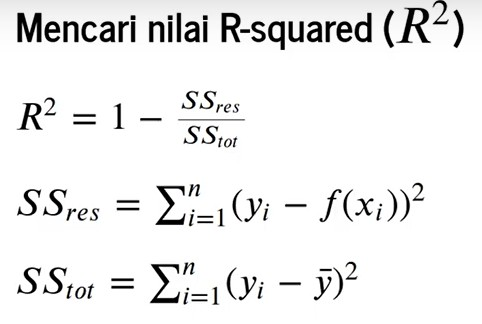

## SSres

In [61]:
ss_res = sum((y_test - y_pred)**2)
print(f'SSres = {ss_res}')

SSres = 3.2819745838287755


## SStot

In [60]:
y_mean = y_test.mean()
ss_tot = sum((y_test-y_mean)**2)
print(f'SStot = {ss_tot}')

SStot = 138.2


## 1-(SSres/SStot)

In [62]:
r_squared = 1 - (ss_res/ss_tot)
print(f'R-squared = {r_squared}')

R-squared = 0.9762519928811232


## R2-Squared dengan Sklearn

In [45]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_squared = r2_score(y_test, y_pred)

print(f'R2-Squared = {r2_squared}')

R2-Squared = 0.9762519928811232
